Copyright © The University of Edinburgh, 2024.

Development has been supported by GSK.

# Notebook to examine training stability with different seeds and also triplet composition

## Investigate stability:
Submission of the 'run_investigate_training.sbatch' script to HPC to populate the working_dir/TripletLoss/trained/155_investigate_training directory with checkpoints and training logs readable with tensorboard though performance of these actions:
- Twice performs the action of training the TripletLoss-metric network using split 1,1 (see ELN155435) and a random state of 7.
- Performs the action of training the TripletLoss-metric network using split 1,1 (see ELN155435) and a random state of 21.
- Performs the action of training the TripletLoss-metric network using split 1,1 (see ELN155435) and a random state of 28.
- Performs the action of training the TripletLoss-metric network using split 1,1 (see ELN155435) and a random state of 35.

Tensorboard was then used to write the following files to working_dir/TripletLoss/trained/155_investigate_training/:

- run-lightning_logs_cls_1_moas_1_seed_35_version_0-tag-loss.csv
- run-lightning_logs_cls_1_moas_1_seed_28_version_0-tag-loss.csv
- run-lightning_logs_cls_1_moas_1_seed_21_version_0-tag-loss.csv
- run-lightning_logs_cls_1_moas_1_seed_14_version_0-tag-loss.csv
- run-lightning_logs_cls_1_moas_1_seed_7_version_1-tag-val_accuracy.csv
- run-lightning_logs_cls_1_moas_1_seed_7_version_0-tag-val_accuracy.csv
- run-lightning_logs_cls_1_moas_1_seed_7_version_1-tag-loss.csv
- run-lightning_logs_cls_1_moas_1_seed_7_version_0-tag-loss.csv
- run-lightning_logs_cls_1_moas_1_seed_35_version_0-tag-val_accuracy.csv
- run-lightning_logs_cls_1_moas_1_seed_28_version_0-tag-val_accuracy.csv
- run-lightning_logs_cls_1_moas_1_seed_21_version_0-tag-val_accuracy.csv
- run-lightning_logs_cls_1_moas_1_seed_14_version_0-tag-val_accuracy.csv

## Examine multiple training runs of models based on Optuna trial 155 hyperparameters - ensuring reproducibility


Plot loss

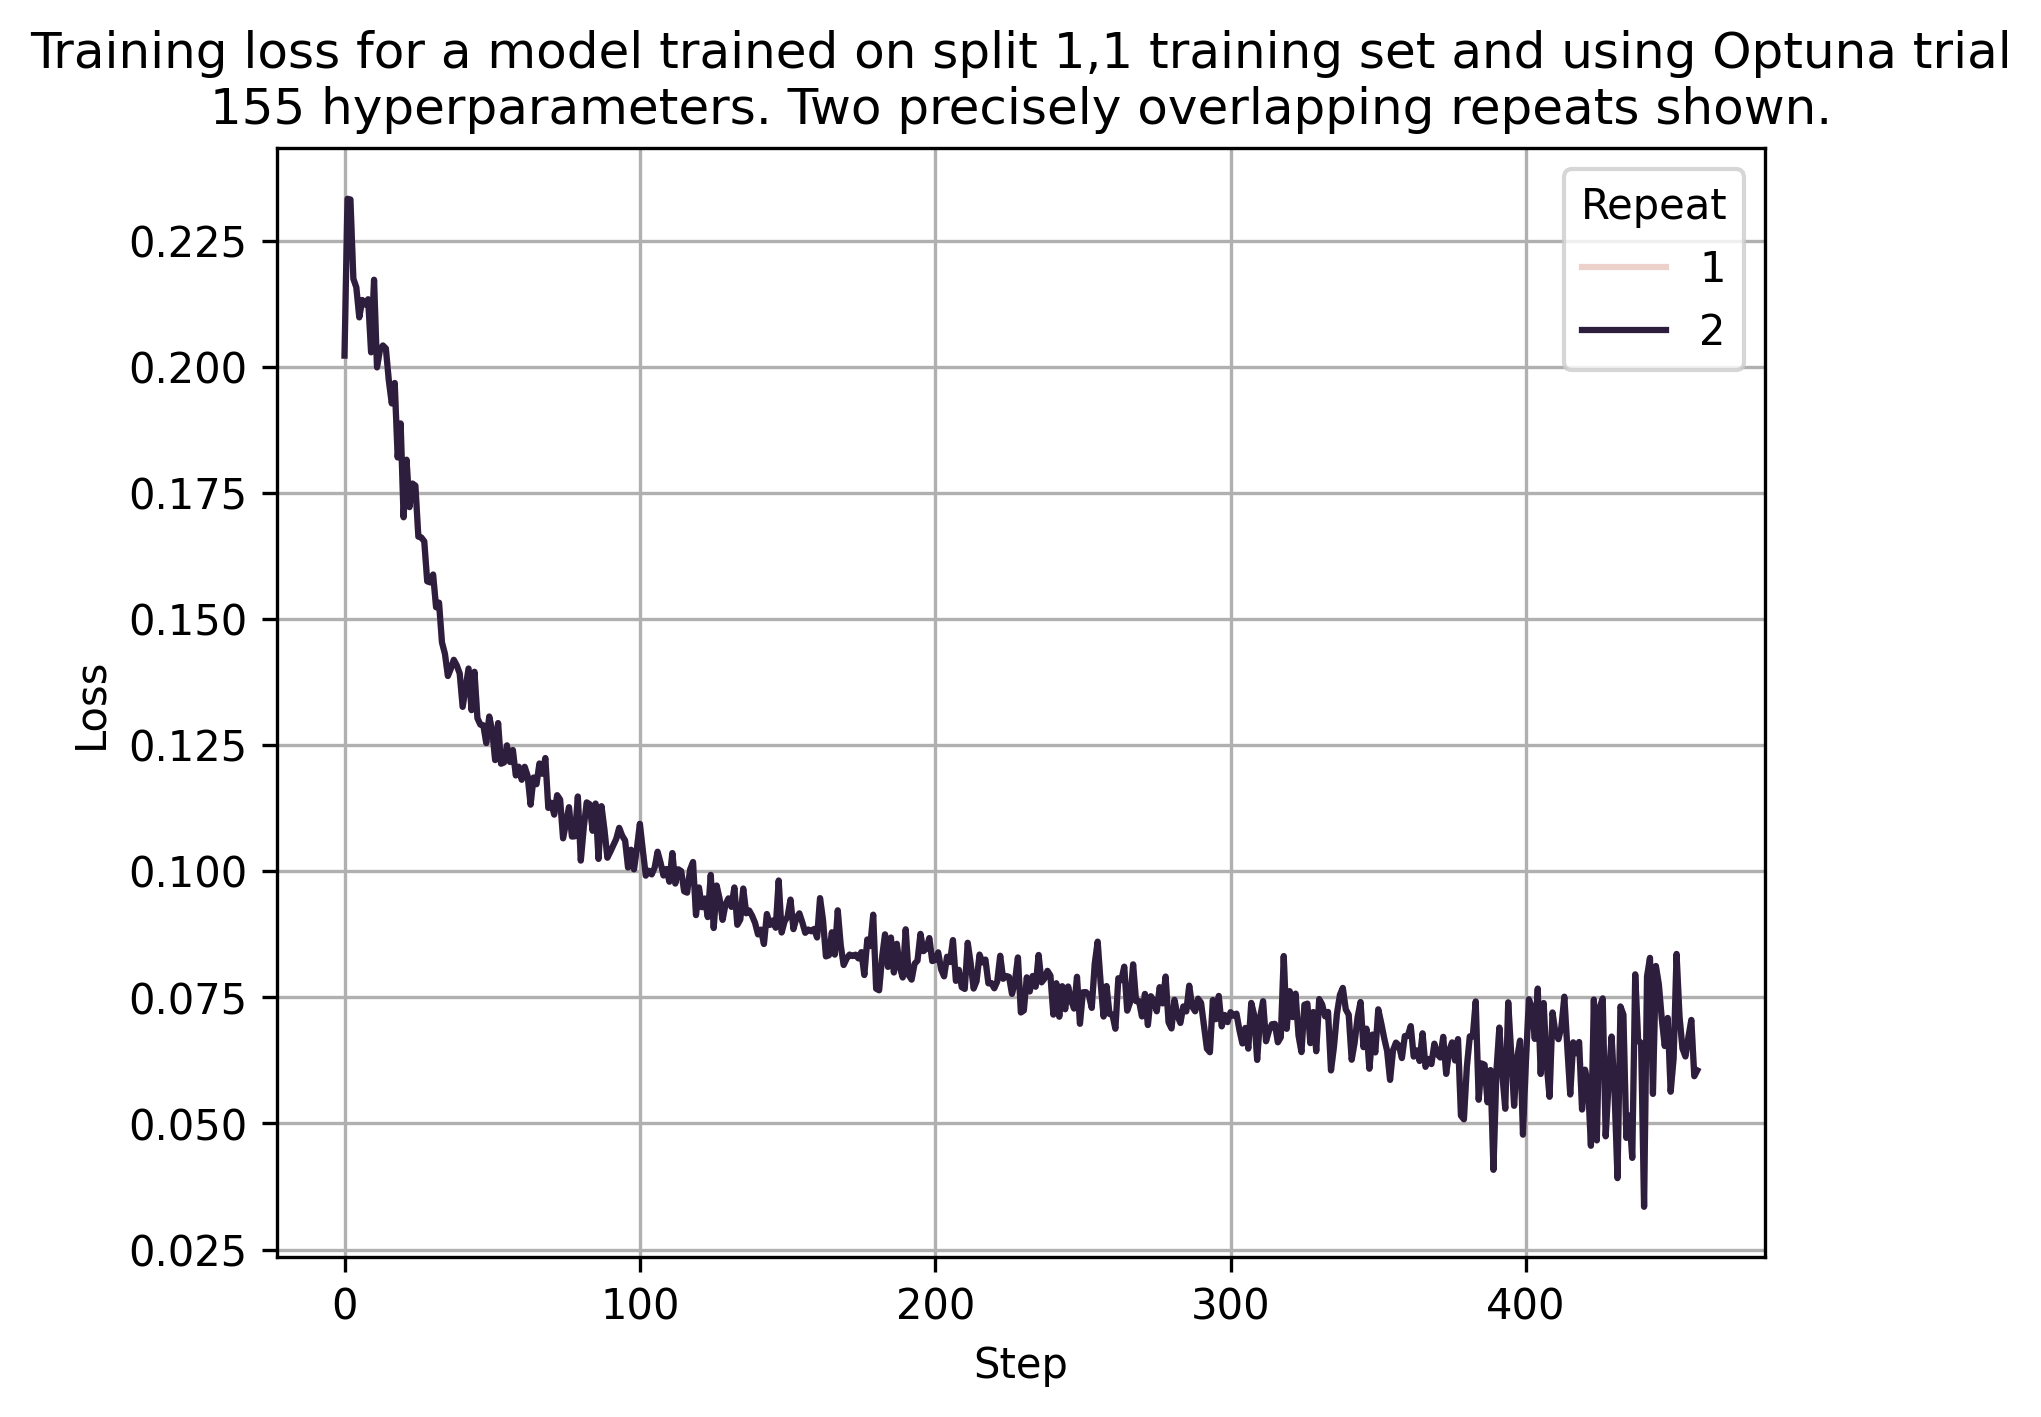

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
df_list=[]
for f in Path("working_dir/TripletLoss/trained/155_investigate_training").glob("run-lightning_logs_cls_1_moas_1_seed_7_version_*-tag-loss.csv"):
    tmp_df=pd.read_csv(f)
    tmp_df['Repeat']=int(str(f).split("_")[-1].split("-")[0])+1
    df_list.append(tmp_df)
df=pd.concat(df_list)
df.to_csv(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_reproducibility_loss.csv")
fig, ax=plt.subplots(1, dpi=300)
sns.lineplot(df, x="Step", y="Value", hue="Repeat", ax=ax)
ax.set_title("Training loss for a model trained on split 1,1 training set and using Optuna trial\n155 hyperparameters. Two precisely overlapping repeats shown.")
ax.set_ylabel("Loss")
ax.grid()
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_reproducibility_loss.png", bbox_inches='tight', dpi=300)
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_reproducibility_loss.svg", bbox_inches='tight')

Next plot validation accuracy


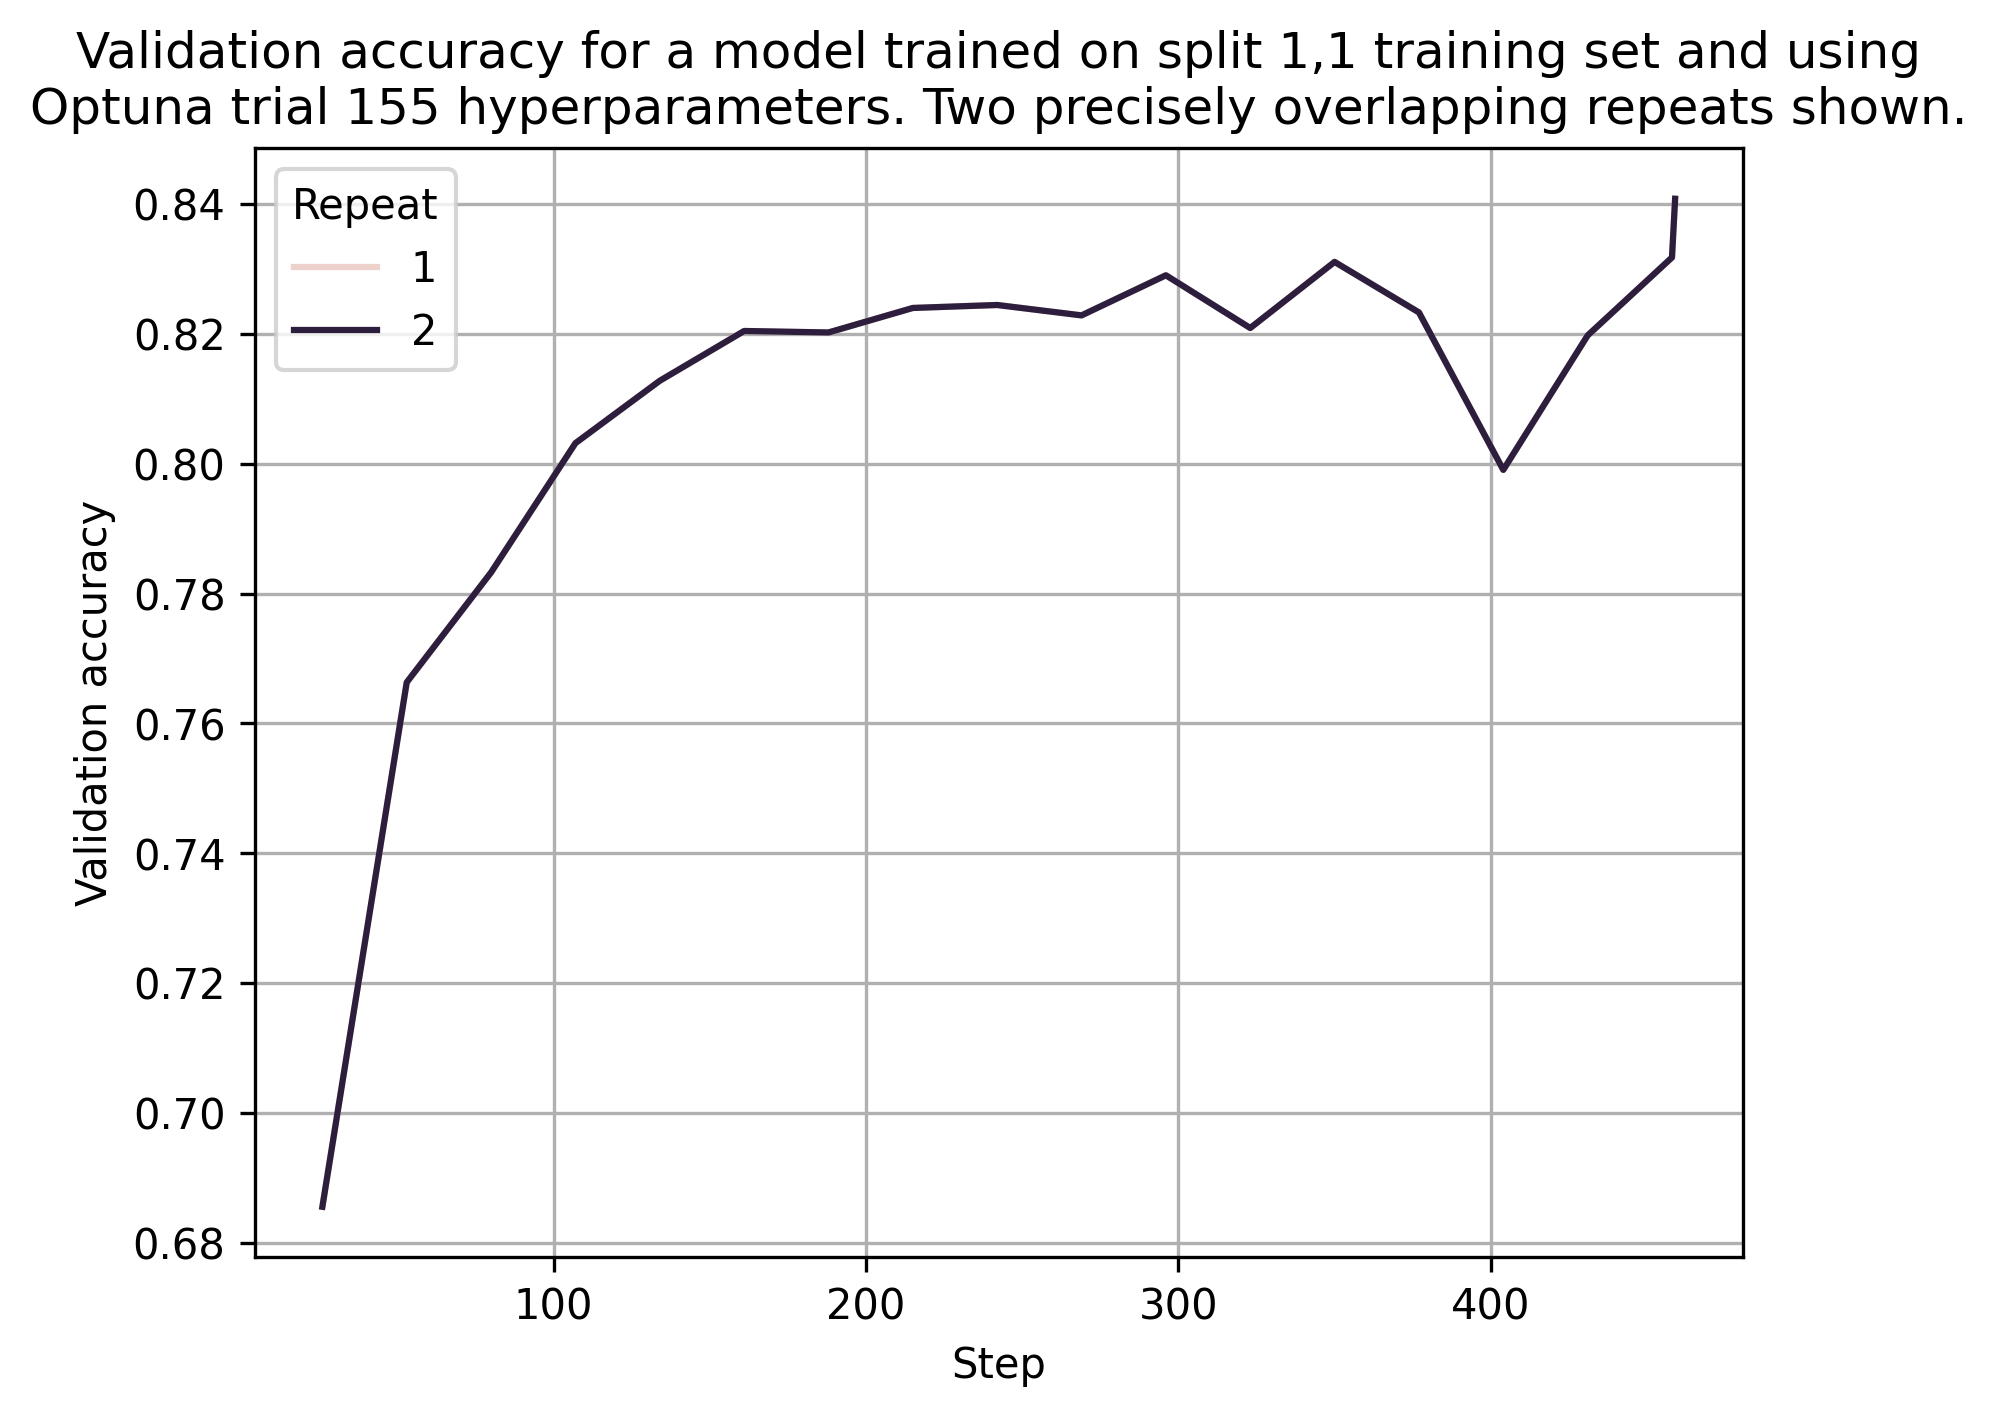

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
df_list=[]
for f in Path("working_dir/TripletLoss/trained/155_investigate_training").glob("run-lightning_logs_cls_1_moas_1_seed_7_version_*-tag-val_accuracy.csv"):
    tmp_df=pd.read_csv(f)
    tmp_df['Repeat']=int(str(f).split("_")[-2].split("-")[0])+1
    df_list.append(tmp_df)
df=pd.concat(df_list)
df.to_csv(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_reproducibility_val_accuracy.csv")
fig, ax=plt.subplots(1, dpi=300)
sns.lineplot(df, x="Step", y="Value", hue="Repeat", ax=ax)
ax.set_title("Validation accuracy for a model trained on split 1,1 training set and using\nOptuna trial 155 hyperparameters. Two precisely overlapping repeats shown.")
ax.set_ylabel("Validation accuracy")
ax.grid()
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_reproducibility_val_accuracy.png", bbox_inches='tight', dpi=300)
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_reproducibility_val_accuracy.svg", bbox_inches='tight')

## Examine training of the 155 model architecture on split 1,1 using different initial random states


First for loss

,Wall time,Step,Value,Seed
0,1.693824e+09,0,0.201213,21
1,1.693824e+09,1,0.232675,21
2,1.693824e+09,2,0.237410,21
3,1.693824e+09,3,0.213999,21
4,1.693824e+09,4,0.215193,21
...,...,...,...,...
454,1.693824e+09,454,0.061776,14
455,1.693824e+09,455,0.054144,14
456,1.693824e+09,456,0.032113,14
457,1.693824e+09,457,0.061923,14


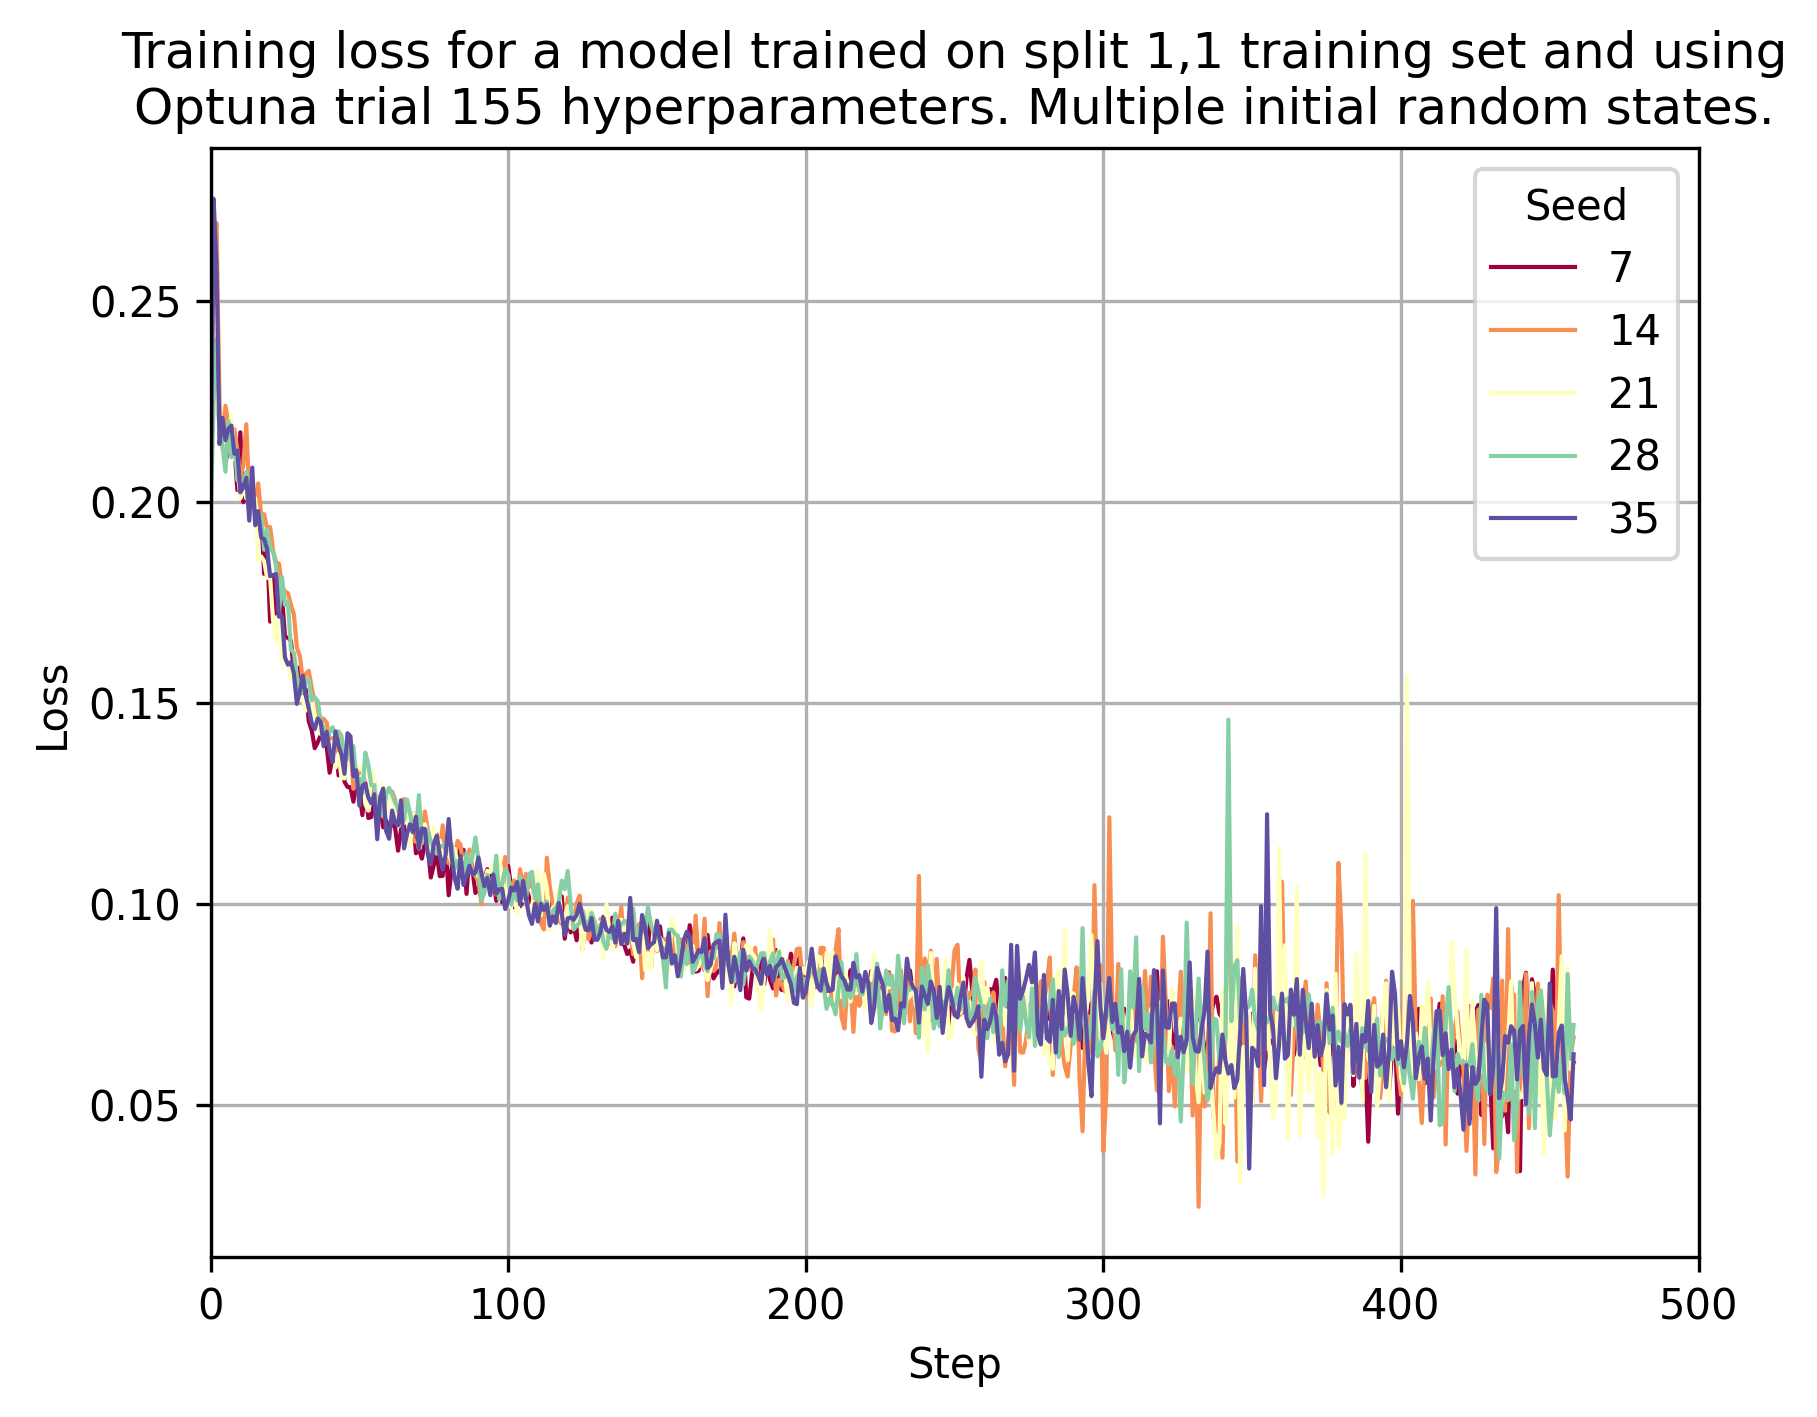

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
df_list=[]
for f in Path("working_dir/TripletLoss/trained/155_investigate_training").glob("run-lightning_logs_cls_1_moas_1_seed_*_version_0-tag-loss.csv"):
    tmp_df=pd.read_csv(f)
    tmp_df['Seed']=int(f.stem.split("_")[7])
    df_list.append(tmp_df)
df=pd.concat(df_list)
display(df)
df.to_csv(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_stability_loss.csv")
fig, ax=plt.subplots(1, dpi=300)
sns.lineplot(df, x="Step", y="Value", hue="Seed", ax=ax,estimator=None,    linewidth=1, palette=sns.color_palette("Spectral", as_cmap=True))
ax.set_title("Training loss for a model trained on split 1,1 training set and using\nOptuna trial 155 hyperparameters. Multiple initial random states.")
ax.set_ylabel("Loss")
ax.set_xlim(0,500)
ax.grid()
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_stability_loss.png", bbox_inches='tight', dpi=300)
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_stability_loss.svg", bbox_inches='tight')

Next for validation accuracy

,Wall time,Step,Value,Seed
0,1.693824e+09,26,0.643666,14
1,1.693824e+09,53,0.761185,14
2,1.693824e+09,80,0.783843,14
3,1.693824e+09,107,0.792196,14
4,1.693824e+09,134,0.809131,14
...,...,...,...,...
13,1.693824e+09,377,0.823321,7
14,1.693824e+09,404,0.799062,7
15,1.693824e+09,431,0.819773,7
16,1.693824e+09,458,0.831789,7


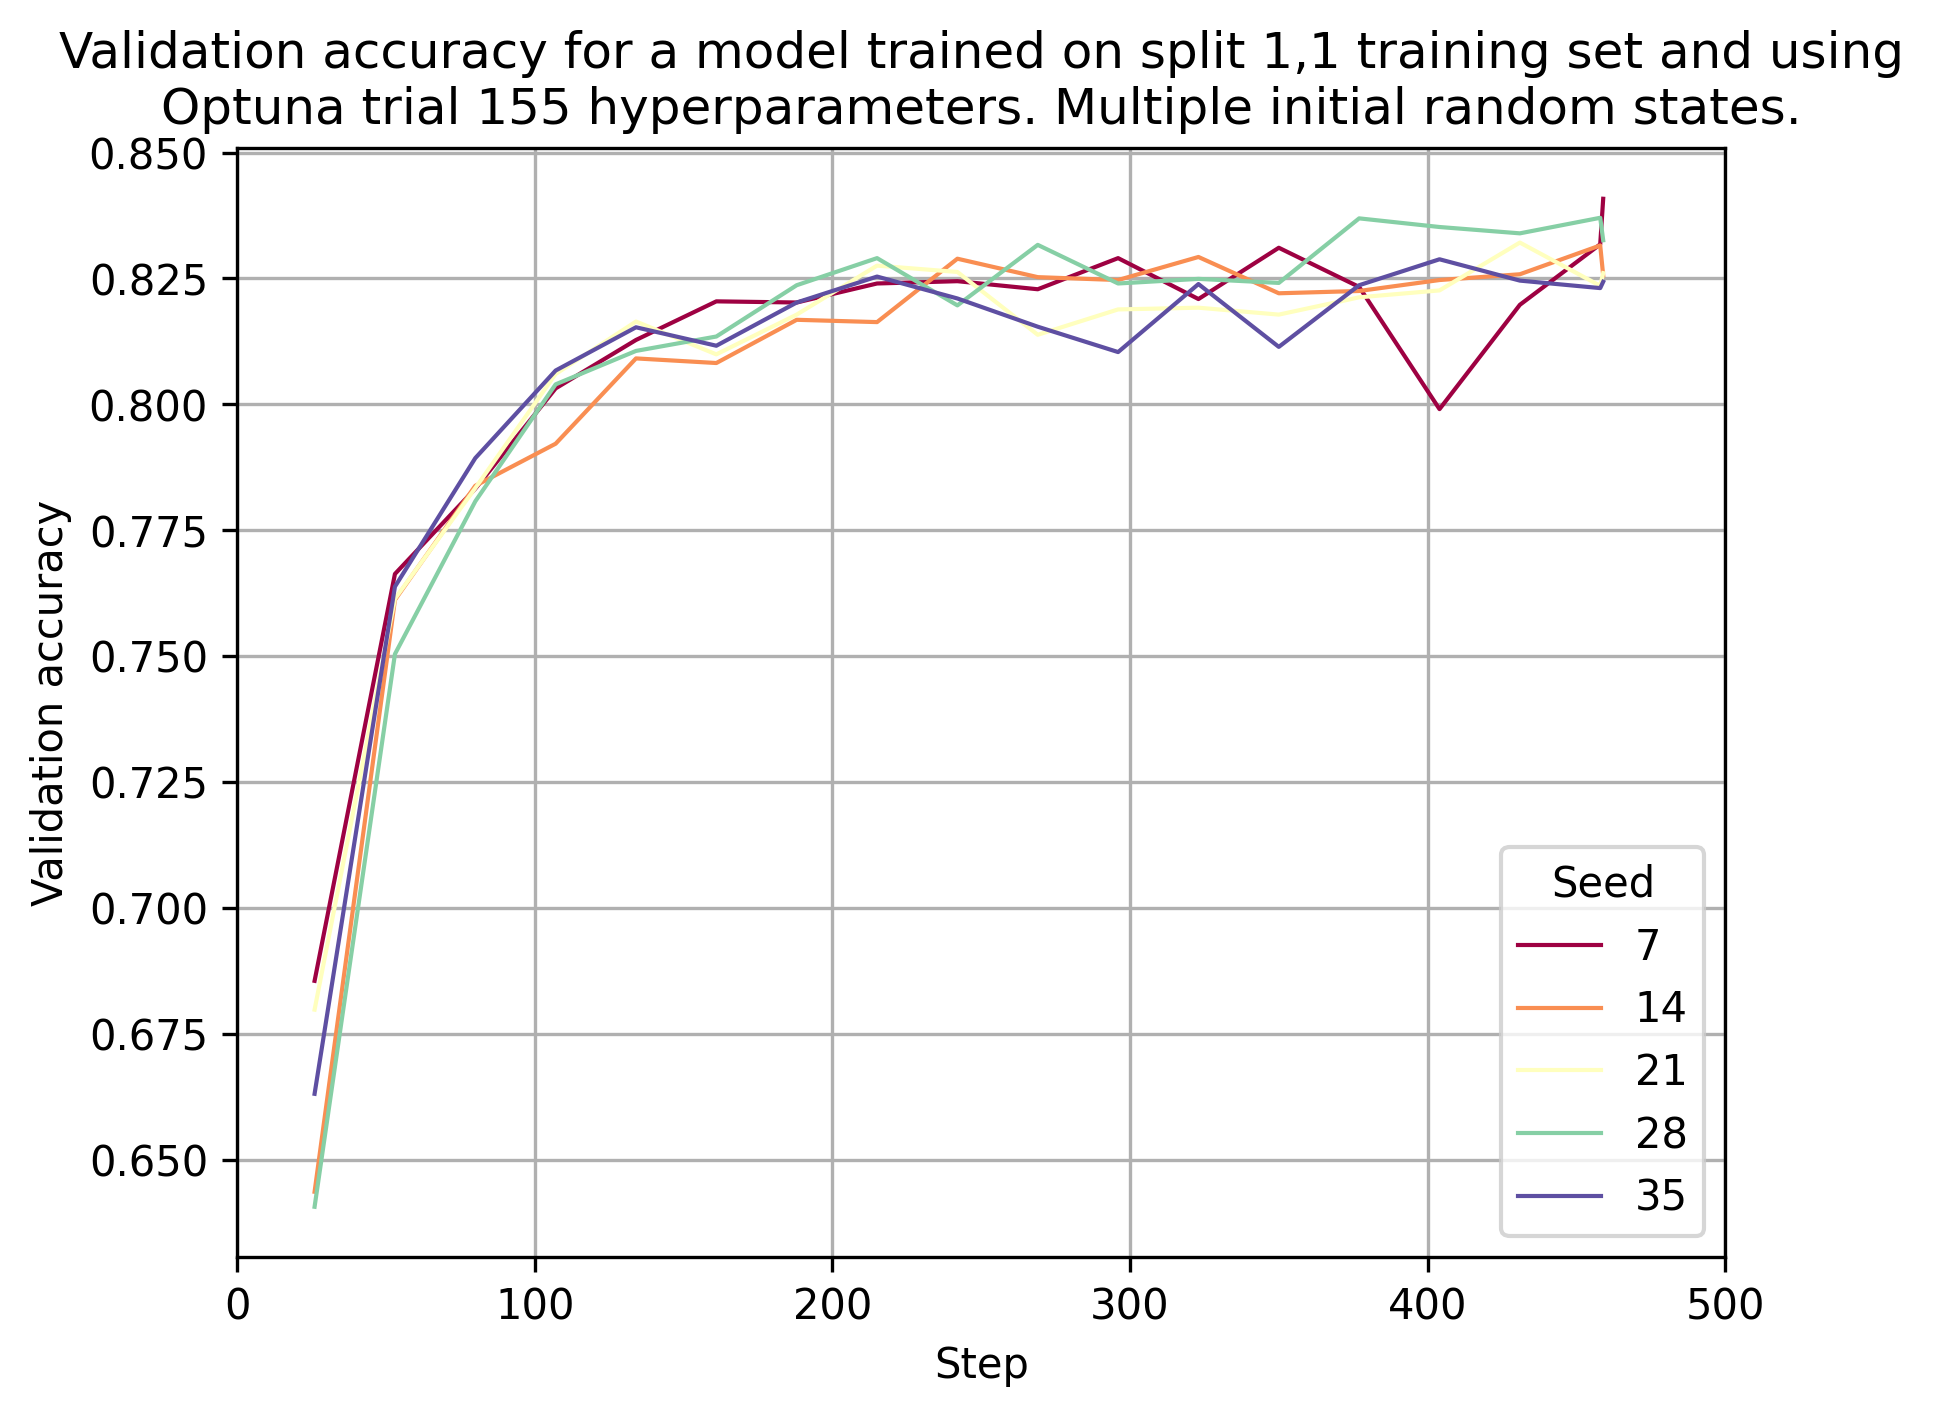

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
df_list=[]
for f in Path("working_dir/TripletLoss/trained/155_investigate_training").glob("run-lightning_logs_cls_1_moas_1_seed_*_version_0-tag-val_accuracy.csv"):
    tmp_df=pd.read_csv(f)
    tmp_df['Seed']=int(f.stem.split("_")[7])
    df_list.append(tmp_df)
df=pd.concat(df_list)
display(df)
df.to_csv(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_stability_val_accuracy.csv")
fig, ax=plt.subplots(1, dpi=300)
sns.lineplot(df, x="Step", y="Value", hue="Seed", ax=ax,estimator=None,    linewidth=1, palette=sns.color_palette("Spectral", as_cmap=True))
ax.set_title("Validation accuracy for a model trained on split 1,1 training set and using\nOptuna trial 155 hyperparameters. Multiple initial random states.")

ax.set_ylabel("Validation accuracy")
ax.grid()
ax.set_xlim(0,500)
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_stability_val_accuracy.png", bbox_inches='tight', dpi=300)
plt.savefig(Path("working_dir/TripletLoss/trained/155_investigate_training/")/"training_stability_val_accuracy.svg", bbox_inches='tight')

# Plot fraction semi-hard triplets

Literature points to efficient training of triplet loss models occurring when trained with semi-hard triplets (see Schroff, Florian, Dmitry Kalenichenko, and James Philbin. "Facenet: A unified embedding for face recognition and clustering." Proceedings of the IEEE conference on computer vision and pattern recognition. 2015.). Whilst no code was written to ensure training proceeded using only semi-hard triplets, it was possible that the triplet assignment scheme used which did not enforce positives to be from the same cell line or be at the same dose, naturally formed semi-hard triplets. This was investigated by running model training with logging of easy, semi-hard and hard triplets.

Information on triplets encountered during training was captured using the script "run_investigate_training_triplet_types.sbatch" which was submitted to UK-HPC using slurm and performs the following: 

This wrote tensorboard compatible logs to the following directories:

working_dir/TripletLoss/trained/frac_sh_triplets/original

Training data was then visualised using tensorboard and written out to CSV files

- run-trained_155_frac_sh_triplets_original_lightning_logs_cls_1_moas_1_seed_7_version_0-tag-fraction_easy_triplets.csv
- run-trained_155_frac_sh_triplets_original_lightning_logs_cls_1_moas_1_seed_7_version_0-tag-fraction_hard_triplets.csv
- run-trained_155_frac_sh_triplets_original_lightning_logs_cls_1_moas_1_seed_7_version_0-tag-fraction_semi_hard_triplets.csv
- run-trained_155_frac_sh_triplets_original_lightning_logs_cls_1_moas_1_seed_7_version_0-tag-loss.csv

The code below combines this information files into one coherent dataframe, writes it to a CSV file and finally produces a plot.

,Easy triplets,Hard triplets,Semi-hard triplets,Loss
Step,,,,
0,0.084753,0.491890,0.423358,0.202231
1,0.306975,0.453366,0.239659,0.233330
2,0.332522,0.444039,0.223439,0.233183
3,0.264396,0.464315,0.271290,0.217467
4,0.230333,0.461071,0.308597,0.215786
...,...,...,...,...
454,0.668289,0.130170,0.201541,0.063280
455,0.667883,0.141930,0.190187,0.067091
456,0.648824,0.147607,0.203569,0.070519


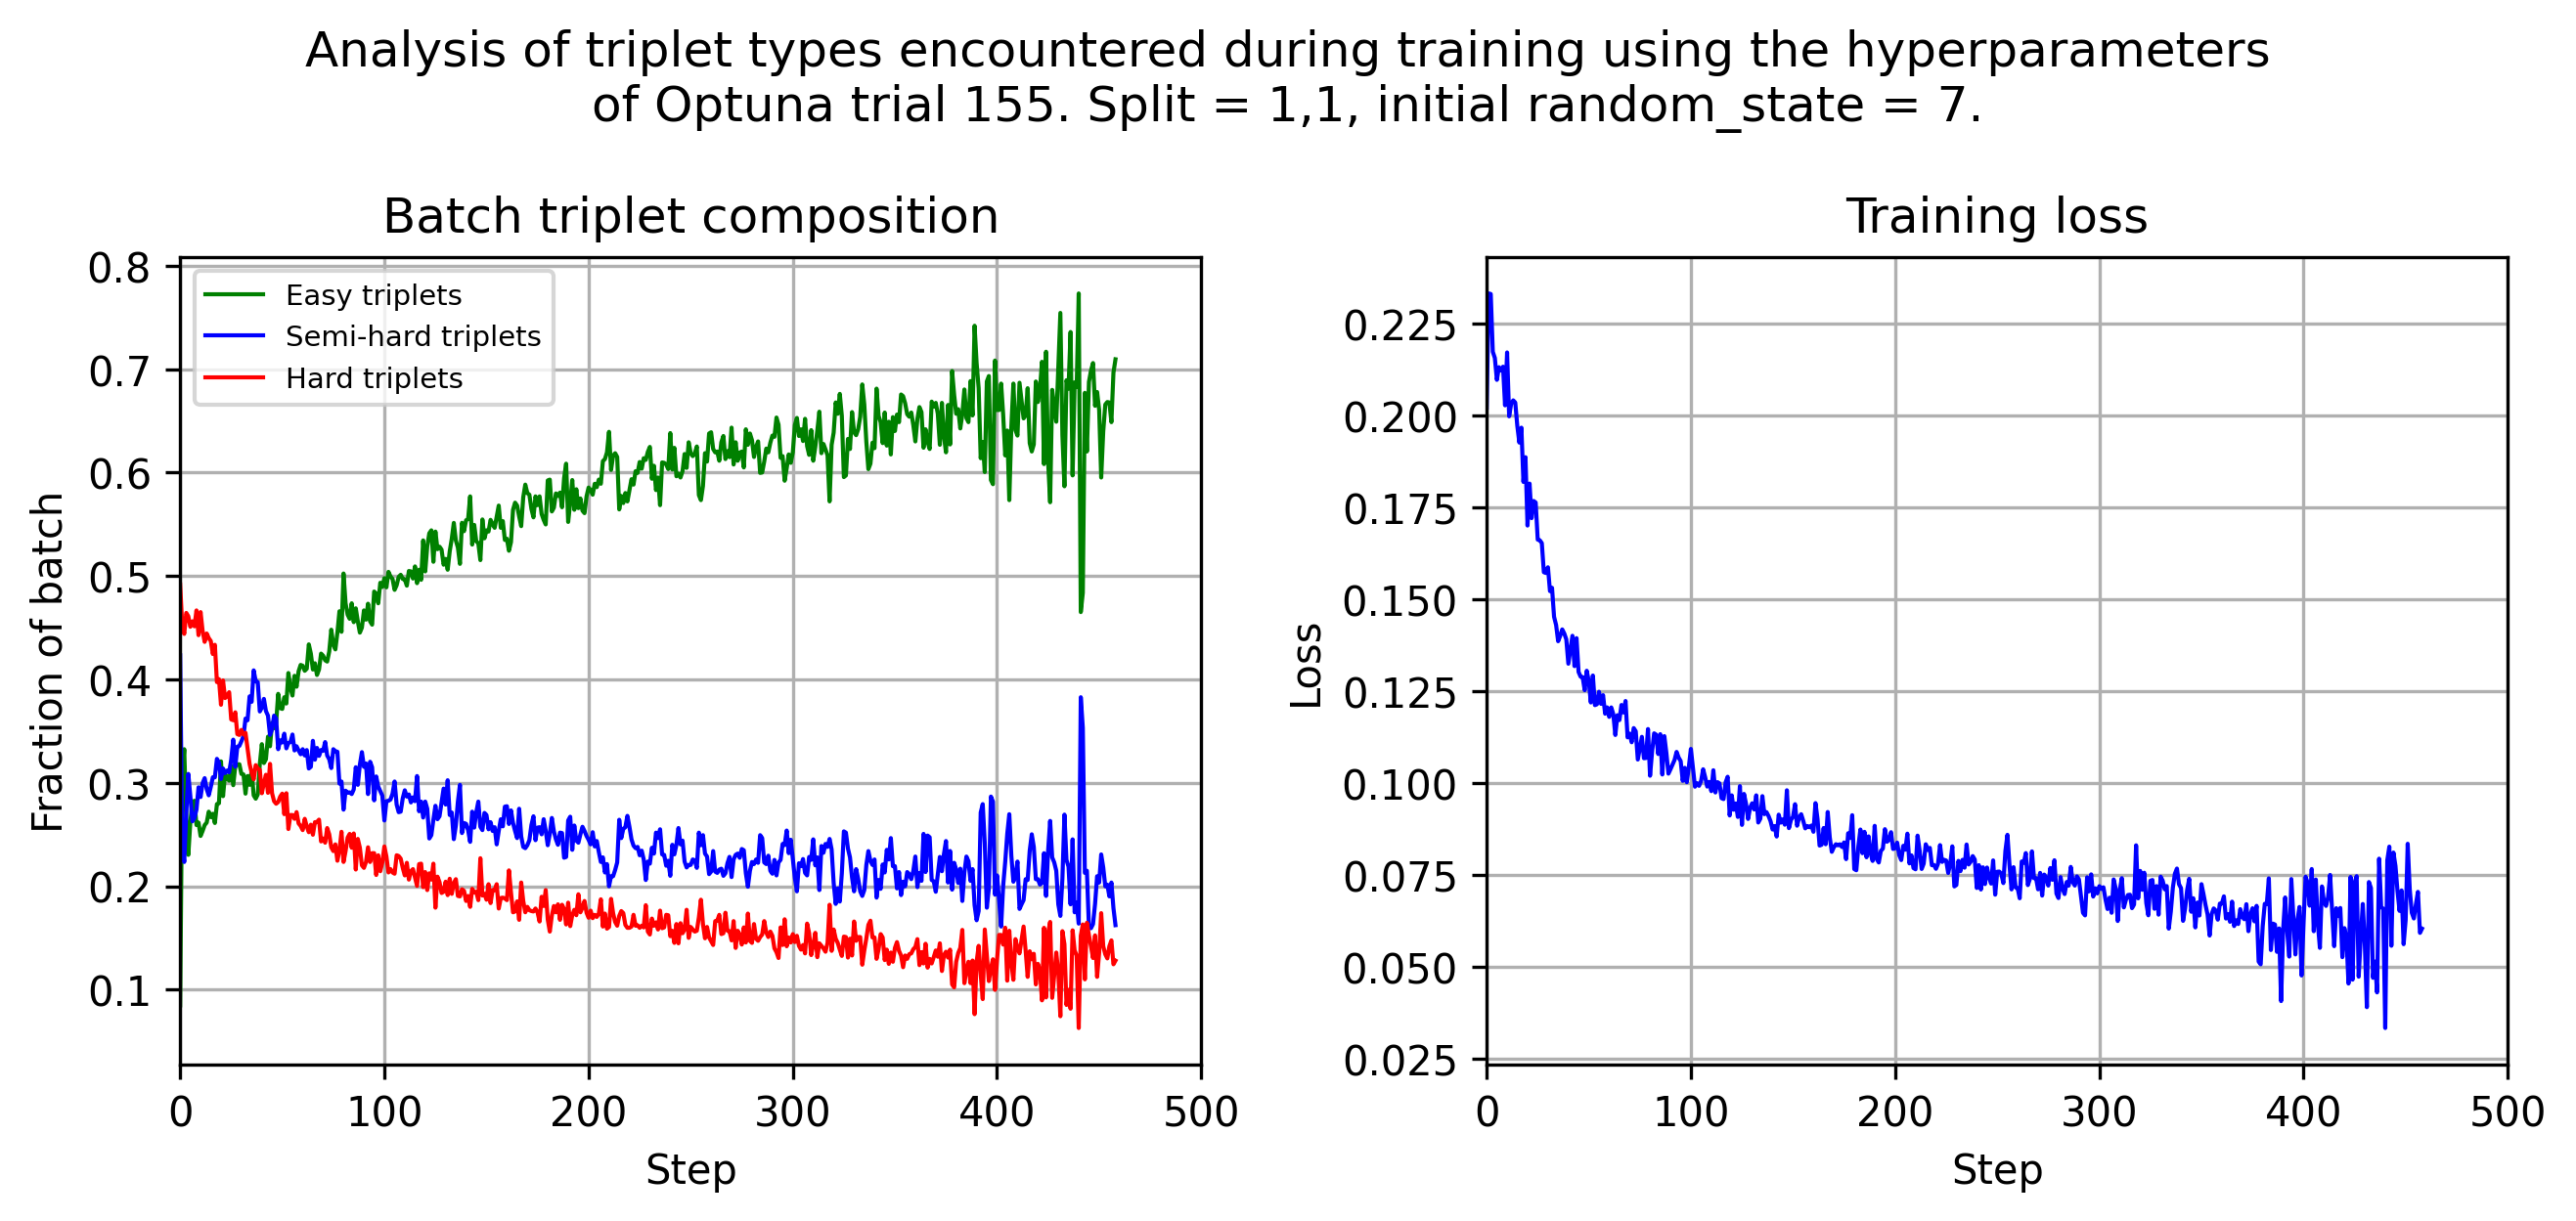

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
df_loss_list=[]
# Make perf_df

data_dir=Path("working_dir/TripletLoss/trained/155_frac_sh_triplets")
prop_dfs=[]
for f in data_dir.glob("run-trained_155_frac_sh_triplets_original_lightning_logs_cls_1_moas_1_seed_7_version_0-tag-*.csv"):
    if "val" in str(f):continue
    property=str(f).split("0-tag-")[1].replace(".csv","")
    df=pd.read_csv(f, index_col=1).drop(columns="Wall time").rename(columns={'Value':property})
    #display(df)
    prop_dfs.append(df)
df=pd.concat(prop_dfs, axis=1).rename(columns={'fraction_easy_triplets':'Easy triplets','fraction_semi_hard_triplets':'Semi-hard triplets','fraction_hard_triplets':'Hard triplets', 'loss':'Loss'})
display(df)
df.to_csv(Path("working_dir/TripletLoss/trained/155_frac_sh_triplets")/"triplet_types_during_training.csv")

del prop_dfs
fig, ax=plt.subplots(1,2, dpi=300, figsize=(7.4*1.2, 3.5*1.2))
sns.lineplot(df, x="Step", y="Easy triplets", ax=ax[0], label="Easy triplets", linewidth=1, color='green')
sns.lineplot(df, x="Step", y="Semi-hard triplets", ax=ax[0], label="Semi-hard triplets", linewidth=1, color='blue')
sns.lineplot(df, x="Step", y="Hard triplets", ax=ax[0], label="Hard triplets", linewidth=1, color='red')
sns.lineplot(df, x="Step", y="Loss",  ax=ax[1], linewidth=1, color='blue')
fig.suptitle("Analysis of triplet types encountered during training using the hyperparameters\nof Optuna trial 155. Split = 1,1, initial random_state = 7.")
ax[0].set_title("Batch triplet composition")
ax[0].set_ylabel("Fraction of batch")
ax[1].set_title("Training loss")
ax[0].grid()
ax[1].grid()
ax[0].legend(fontsize=7)

ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
plt.tight_layout()
plt.savefig(Path("working_dir/TripletLoss/trained/155_frac_sh_triplets")/"triplet_types_during_training.png", bbox_inches='tight', dpi=300)
plt.savefig(Path("working_dir/TripletLoss/trained/155_frac_sh_triplets")/"triplet_types_during_training.svg", bbox_inches='tight', dpi=300)
